In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
import scipy.stats as st
import seaborn as sns
from statsmodels.formula.api import ols

# Importation des données 

In [3]:
customers = pd.read_csv('customers.csv', sep=',')
products = pd.read_csv('products.csv', sep=',')
transactions = pd.read_csv('transactions.csv', sep=',')

# Dataframe Products

In [4]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [5]:
products.shape

(3287, 3)

In [6]:
products.info

<bound method DataFrame.info of      id_prod   price  categ
0     0_1421   19.99      0
1     0_1368    5.13      0
2      0_731   17.99      0
3      1_587    4.99      1
4     0_1507    3.99      0
...      ...     ...    ...
3282    2_23  115.99      2
3283   0_146   17.14      0
3284   0_802   11.22      0
3285   1_140   38.56      1
3286  0_1920   25.16      0

[3287 rows x 3 columns]>

In [7]:
products.size

9861

In [8]:
products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [9]:
products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [10]:
products.isna().sum() 

id_prod    0
price      0
categ      0
dtype: int64

In [11]:
products.duplicated().sum()

0

In [12]:
products.value_counts()

id_prod  price   categ
0_0       3.75   0        1
0_899     19.99  0        1
0_89      14.99  0        1
0_890     2.81   0        1
0_891     21.99  0        1
                         ..
0_1987    6.99   0        1
0_1988    9.86   0        1
0_1989    3.99   0        1
0_199     8.99   0        1
T_0      -1.00   0        1
Length: 3287, dtype: int64

# Dataframe Customers

In [13]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [14]:
customers.shape

(8623, 3)

In [15]:
customers.info

<bound method DataFrame.info of      client_id sex  birth
0       c_4410   f   1967
1       c_7839   f   1975
2       c_1699   f   1984
3       c_5961   f   1962
4       c_5320   m   1943
...        ...  ..    ...
8618    c_7920   m   1956
8619    c_7403   f   1970
8620    c_5119   m   1974
8621    c_5643   f   1968
8622      c_84   f   1982

[8623 rows x 3 columns]>

In [16]:
customers.size

25869

In [17]:
customers.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [18]:
customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [19]:
customers.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [20]:
customers.duplicated().sum()

0

# Dataframe Transactions

In [21]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [22]:
transactions.shape

(679532, 4)

In [23]:
transactions.info

<bound method DataFrame.info of        id_prod                        date session_id client_id
0       0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
1        1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
2       0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
3        2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
4       0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232
...        ...                         ...        ...       ...
679527  0_1551  2022-01-15 13:05:06.246925   s_150195    c_8489
679528   1_639  2022-03-19 16:03:23.429229   s_181434    c_4370
679529  0_1425  2022-12-20 04:33:37.584749   s_314704     c_304
679530  0_1994  2021-07-16 20:36:35.350579    s_63204    c_2227
679531   1_523  2022-09-28 01:12:01.973763   s_274568    c_3873

[679532 rows x 4 columns]>

In [24]:
transactions.size

2718128

In [25]:
transactions.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [26]:
transactions.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [27]:
transactions.duplicated().sum()

126

In [28]:
transactions.drop(transactions[transactions['date'].str.startswith('test')].index, inplace=True)

In [29]:
transactions.sort_values('session_id')

,id_prod,date,session_id,client_id
480642,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
138915,1_635,2021-03-01 00:10:33.163037,s_10,c_2218
360110,0_1030,2021-03-01 04:12:43.572994,s_100,c_3854
578825,0_1451,2021-03-01 04:43:58.025677,s_100,c_3854
542757,0_1449,2021-03-03 03:18:58.492283,s_1000,c_1014
...,...,...,...,...
508968,0_1362,2021-10-04 18:58:49.228317,s_99996,c_4900
504526,0_1197,2021-10-04 18:45:38.003516,s_99997,c_3521
48865,0_1411,2021-10-04 18:50:59.099942,s_99998,c_2795
599185,0_1604,2021-10-04 19:00:20.030388,s_99998,c_2795


In [30]:
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [31]:
transactions['date']= pd.to_datetime(transactions['date']).dt.date
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20,s_211425,c_103
1,1_251,2022-02-02,s_158752,c_8534
2,0_1277,2022-06-18,s_225667,c_6714
3,2_209,2021-06-24,s_52962,c_6941
4,0_1509,2023-01-11,s_325227,c_4232


In [32]:
transactions['date']= pd.to_datetime(transactions['date'])
transactions.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

# Jointure entre les dataframe Transactions et Products

In [33]:
# Fusion de products et transactions sur la colonne 'id_prod'
Transactions_Products = transactions.merge(products, how='outer', on='id_prod', indicator='indicator')
Transactions_Products

,id_prod,date,session_id,client_id,price,categ,indicator
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,both
1,0_1518,2021-09-26,s_95811,c_6197,4.18,0.0,both
2,0_1518,2021-05-06,s_30782,c_682,4.18,0.0,both
3,0_1518,2022-03-16,s_180057,c_5932,4.18,0.0,both
4,0_1518,2022-11-12,s_296584,c_7217,4.18,0.0,both
...,...,...,...,...,...,...,...
679349,0_1624,NaT,NaN,NaN,24.50,0.0,right_only
679350,2_86,NaT,NaN,NaN,132.36,2.0,right_only
679351,0_299,NaT,NaN,NaN,22.99,0.0,right_only
679352,0_510,NaT,NaN,NaN,23.66,0.0,right_only


In [34]:
Transactions_Products['indicator'].value_counts()

both          679111
left_only        221
right_only        22
Name: indicator, dtype: int64

In [35]:
indexindicator= Transactions_Products[(Transactions_Products['indicator']=='right_only')].index
Transactions_Products.drop(indexindicator, inplace=True)
Transactions_Products

,id_prod,date,session_id,client_id,price,categ,indicator
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,both
1,0_1518,2021-09-26,s_95811,c_6197,4.18,0.0,both
2,0_1518,2021-05-06,s_30782,c_682,4.18,0.0,both
3,0_1518,2022-03-16,s_180057,c_5932,4.18,0.0,both
4,0_1518,2022-11-12,s_296584,c_7217,4.18,0.0,both
...,...,...,...,...,...,...,...
679327,0_1279,2021-06-23,s_52563,c_1025,20.99,0.0,both
679328,0_1683,2021-12-24,s_139091,c_5508,2.99,0.0,both
679329,0_1379,2021-10-16,s_105547,c_5425,2.99,0.0,both
679330,0_886,2021-03-17,s_7410,c_7219,21.82,0.0,both


In [36]:
indexindicator= Transactions_Products[(Transactions_Products['indicator']=='left_only')].index
Transactions_Products.drop(indexindicator, inplace=True)
Transactions_Products

,id_prod,date,session_id,client_id,price,categ,indicator
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,both
1,0_1518,2021-09-26,s_95811,c_6197,4.18,0.0,both
2,0_1518,2021-05-06,s_30782,c_682,4.18,0.0,both
3,0_1518,2022-03-16,s_180057,c_5932,4.18,0.0,both
4,0_1518,2022-11-12,s_296584,c_7217,4.18,0.0,both
...,...,...,...,...,...,...,...
679327,0_1279,2021-06-23,s_52563,c_1025,20.99,0.0,both
679328,0_1683,2021-12-24,s_139091,c_5508,2.99,0.0,both
679329,0_1379,2021-10-16,s_105547,c_5425,2.99,0.0,both
679330,0_886,2021-03-17,s_7410,c_7219,21.82,0.0,both


In [37]:
Transactions_Products['indicator'].value_counts()

both          679111
left_only          0
right_only         0
Name: indicator, dtype: int64

In [38]:
Transactions_Products.drop(['indicator'], axis=1, inplace=True)
Transactions_Products.head()

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0
1,0_1518,2021-09-26,s_95811,c_6197,4.18,0.0
2,0_1518,2021-05-06,s_30782,c_682,4.18,0.0
3,0_1518,2022-03-16,s_180057,c_5932,4.18,0.0
4,0_1518,2022-11-12,s_296584,c_7217,4.18,0.0


# Jointure entre les dataframes Transactions_Products et Customers

In [39]:
# Fusion sur la colonne 'client_id'
Lapage = Transactions_Products.merge(customers, how='outer', on='client_id', indicator='indicator')
Lapage

,id_prod,date,session_id,client_id,price,categ,sex,birth,indicator
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,1986,both
1,0_1518,2021-07-20,s_64849,c_103,4.18,0.0,f,1986,both
2,0_1518,2022-08-20,s_255965,c_103,4.18,0.0,f,1986,both
3,0_1418,2022-06-18,s_225411,c_103,8.57,0.0,f,1986,both
4,0_1418,2021-08-18,s_77214,c_103,8.57,0.0,f,1986,both
...,...,...,...,...,...,...,...,...,...
679129,NaN,NaT,NaN,c_7584,NaN,NaN,f,1960,right_only
679130,NaN,NaT,NaN,c_90,NaN,NaN,m,2001,right_only
679131,NaN,NaT,NaN,c_587,NaN,NaN,m,1993,right_only
679132,NaN,NaT,NaN,ct_1,NaN,NaN,m,2001,right_only


In [40]:
Lapage['indicator'].value_counts()

both          679111
right_only        23
left_only          0
Name: indicator, dtype: int64

In [41]:
indexindicator= Lapage[(Lapage['indicator']=='right_only')].index
Lapage.drop(indexindicator, inplace=True)
Lapage

,id_prod,date,session_id,client_id,price,categ,sex,birth,indicator
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,1986,both
1,0_1518,2021-07-20,s_64849,c_103,4.18,0.0,f,1986,both
2,0_1518,2022-08-20,s_255965,c_103,4.18,0.0,f,1986,both
3,0_1418,2022-06-18,s_225411,c_103,8.57,0.0,f,1986,both
4,0_1418,2021-08-18,s_77214,c_103,8.57,0.0,f,1986,both
...,...,...,...,...,...,...,...,...,...
679106,2_147,2021-07-23,s_65994,c_4391,181.99,2.0,f,2001,both
679107,0_142,2022-03-25,s_184472,c_1232,19.85,0.0,f,1960,both
679108,0_142,2021-09-25,s_95415,c_1232,19.85,0.0,f,1960,both
679109,2_205,2021-03-11,s_4605,c_7534,100.99,2.0,m,1992,both


In [42]:
Lapage['indicator'].value_counts()

both          679111
left_only          0
right_only         0
Name: indicator, dtype: int64

In [43]:
Lapage.drop(['indicator'], axis=1, inplace=True)
Lapage.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,1986
1,0_1518,2021-07-20,s_64849,c_103,4.18,0.0,f,1986
2,0_1518,2022-08-20,s_255965,c_103,4.18,0.0,f,1986
3,0_1418,2022-06-18,s_225411,c_103,8.57,0.0,f,1986
4,0_1418,2021-08-18,s_77214,c_103,8.57,0.0,f,1986


In [44]:
Lapage.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
price                float64
categ                float64
sex                   object
birth                  int64
dtype: object

# Lapage

In [45]:
Lapage.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,1986
1,0_1518,2021-07-20,s_64849,c_103,4.18,0.0,f,1986
2,0_1518,2022-08-20,s_255965,c_103,4.18,0.0,f,1986
3,0_1418,2022-06-18,s_225411,c_103,8.57,0.0,f,1986
4,0_1418,2021-08-18,s_77214,c_103,8.57,0.0,f,1986


In [46]:
Lapage['birth'].unique()

array([1986, 1985, 1974, 1962, 1976, 1964, 1981, 1975, 1989, 1983, 1940,
       1988, 1977, 1979, 1982, 1972, 1971, 1978, 1980, 1984, 1968, 1969,
       1965, 1956, 1957, 1991, 1958, 1952, 1953, 1967, 1997, 1946, 1990,
       1995, 1935, 1963, 1973, 1987, 2002, 1955, 1970, 2001, 1960, 1938,
       2003, 2000, 1966, 1998, 2004, 1993, 1948, 1942, 1961, 1949, 1950,
       1996, 1959, 1945, 1941, 1944, 1943, 1999, 1992, 1994, 1951, 1954,
       1936, 1934, 1937, 1939, 1947, 1932, 1929, 1931, 1933, 1930],
      dtype=int64)

In [47]:
#Création d'une colonne 'Age'
Lapage['Age']= 2023 - Lapage['birth']
Lapage.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,Age
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,1986,37
1,0_1518,2021-07-20,s_64849,c_103,4.18,0.0,f,1986,37
2,0_1518,2022-08-20,s_255965,c_103,4.18,0.0,f,1986,37
3,0_1418,2022-06-18,s_225411,c_103,8.57,0.0,f,1986,37
4,0_1418,2021-08-18,s_77214,c_103,8.57,0.0,f,1986,37


In [48]:
Lapage.drop(['birth'], axis=1, inplace=True)
Lapage.head()

,id_prod,date,session_id,client_id,price,categ,sex,Age
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,37
1,0_1518,2021-07-20,s_64849,c_103,4.18,0.0,f,37
2,0_1518,2022-08-20,s_255965,c_103,4.18,0.0,f,37
3,0_1418,2022-06-18,s_225411,c_103,8.57,0.0,f,37
4,0_1418,2021-08-18,s_77214,c_103,8.57,0.0,f,37


In [49]:
Lapage.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
price                float64
categ                float64
sex                   object
Age                    int64
dtype: object

In [50]:
Lapage.describe()

,price,categ,Age
count,679111.000000,679111.000000,679111.000000
mean,17.454773,0.441953,45.188851
std,18.328998,0.595042,13.575361
min,0.620000,0.000000,19.000000
25%,8.870000,0.000000,36.000000
50%,13.990000,0.000000,43.000000
75%,18.990000,1.000000,53.000000
max,300.000000,2.000000,94.000000


In [51]:
Lapage.rename(columns={"date":"date_l"}, inplace=True)
Lapage.rename(columns={"price":"C_A"}, inplace=True)
Lapage.head()

,id_prod,date_l,session_id,client_id,C_A,categ,sex,Age
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,37
1,0_1518,2021-07-20,s_64849,c_103,4.18,0.0,f,37
2,0_1518,2022-08-20,s_255965,c_103,4.18,0.0,f,37
3,0_1418,2022-06-18,s_225411,c_103,8.57,0.0,f,37
4,0_1418,2021-08-18,s_77214,c_103,8.57,0.0,f,37


In [52]:
# Création d'une colonne 'Year' via la colonne 'date_l'

In [53]:
Lapage['year']=Lapage['date_l'].dt.year
Lapage.head()

,id_prod,date_l,session_id,client_id,C_A,categ,sex,Age,year
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,37,2022
1,0_1518,2021-07-20,s_64849,c_103,4.18,0.0,f,37,2021
2,0_1518,2022-08-20,s_255965,c_103,4.18,0.0,f,37,2022
3,0_1418,2022-06-18,s_225411,c_103,8.57,0.0,f,37,2022
4,0_1418,2021-08-18,s_77214,c_103,8.57,0.0,f,37,2021


In [54]:
#Création d'une DF sur les années

In [55]:
Lapage_y = Lapage.copy()
Lapage_y.head()

,id_prod,date_l,session_id,client_id,C_A,categ,sex,Age,year
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,37,2022
1,0_1518,2021-07-20,s_64849,c_103,4.18,0.0,f,37,2021
2,0_1518,2022-08-20,s_255965,c_103,4.18,0.0,f,37,2022
3,0_1418,2022-06-18,s_225411,c_103,8.57,0.0,f,37,2022
4,0_1418,2021-08-18,s_77214,c_103,8.57,0.0,f,37,2021


In [56]:
Lapage_y.groupby( by="year").sum()

,C_A,categ,Age
year,,,
2021,4770826.56,115812.0,12557086
2022,6108681.81,159044.0,15670689
2023,974220.31,25279.0,2460471


In [57]:
Lapage_y.drop(columns=["categ"], axis=1, inplace=True)
Lapage_y.drop(columns=["Age"], axis=1, inplace=True)
Lapage_y.groupby( by="year").sum()

,C_A
year,
2021,4770826.56
2022,6108681.81
2023,974220.31


In [58]:
# Chiffre d'affaire par année

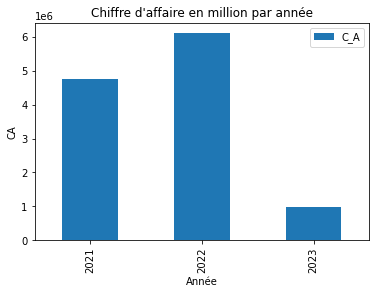

In [59]:
Lapage_y.groupby(by="year").sum().plot(kind="bar")
plt.xlabel('Année')
plt.ylabel('CA')
plt.title("Chiffre d'affaire en million par année")
plt.show()

In [60]:
Lapage['month']=Lapage['date_l'].dt.month
Lapage.head()

,id_prod,date_l,session_id,client_id,C_A,categ,sex,Age,year,month
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,37,2022,5
1,0_1518,2021-07-20,s_64849,c_103,4.18,0.0,f,37,2021,7
2,0_1518,2022-08-20,s_255965,c_103,4.18,0.0,f,37,2022,8
3,0_1418,2022-06-18,s_225411,c_103,8.57,0.0,f,37,2022,6
4,0_1418,2021-08-18,s_77214,c_103,8.57,0.0,f,37,2021,8


# Chiffre d'affaire pour 2021

In [61]:
Lapage_2021 = Lapage.copy()
Lapage_2021.set_index("year", inplace=True)
Lapage_2021.drop([2022, 2023], inplace=True)
Lapage_2021.head()

,id_prod,date_l,session_id,client_id,C_A,categ,sex,Age,month
year,,,,,,,,,
2021,0_1518,2021-07-20,s_64849,c_103,4.18,0.0,f,37,7
2021,0_1418,2021-08-18,s_77214,c_103,8.57,0.0,f,37,8
2021,0_2110,2021-12-27,s_141025,c_103,7.04,0.0,f,37,12
2021,0_1083,2021-12-21,s_137499,c_103,16.99,0.0,f,37,12
2021,1_381,2021-03-09,s_4122,c_103,15.99,1.0,f,37,3


In [62]:
Lapage_2021.drop(columns=["categ", "Age"], inplace=True)
Lapage_2021.groupby("month").sum()

,C_A
month,
3,482440.61
4,476109.30
5,492943.47
6,484088.56
7,482835.40
8,482284.79
9,507240.68
10,320798.74
11,516167.73


In [63]:
Lapage_2021["C_A"].sum()

4770826.5600000005

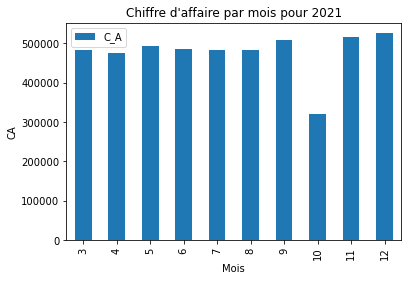

In [64]:
Lapage_2021.groupby("month").sum().plot(kind="bar")
plt.xlabel('Mois')
plt.ylabel('CA')
plt.title("Chiffre d'affaire par mois pour 2021")
plt.show()

# Chiffre d'affaire pour 2022

In [65]:
Lapage_2022 = Lapage.copy()
Lapage_2022.set_index("year", inplace=True)
Lapage_2022.drop([2021, 2023], inplace=True)
Lapage_2022.drop(columns=["categ", "Age"], inplace=True)
Lapage_2022.head()

,id_prod,date_l,session_id,client_id,C_A,sex,month
year,,,,,,,
2022,0_1518,2022-05-20,s_211425,c_103,4.18,f,5
2022,0_1518,2022-08-20,s_255965,c_103,4.18,f,8
2022,0_1418,2022-06-18,s_225411,c_103,8.57,f,6
2022,0_2110,2022-07-27,s_244686,c_103,7.04,f,7
2022,1_370,2022-09-07,s_264739,c_103,13.11,f,9


In [66]:
Lapage_2022["C_A"].sum()

6108681.81

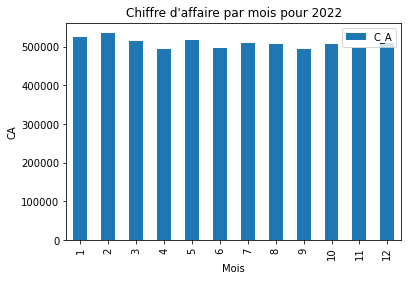

In [67]:
Lapage_2022.groupby("month").sum().plot(kind="bar")
plt.xlabel('Mois')
plt.ylabel('CA')
plt.title("Chiffre d'affaire par mois pour 2022")
plt.show()

# Chiffre d'affaire pour 2023
(année en cours)

In [68]:
Lapage_2023 = Lapage.copy()
Lapage_2023.set_index("year", inplace=True)
Lapage_2023.drop([2021, 2022], inplace=True)
Lapage_2023.drop(columns=["categ", "Age"], inplace=True)
Lapage_2023.head()

,id_prod,date_l,session_id,client_id,C_A,sex,month
year,,,,,,,
2023,1_397,2023-01-25,s_331958,c_103,18.99,f,1
2023,0_1028,2023-01-25,s_332195,c_103,4.51,f,1
2023,0_1104,2023-02-08,s_338755,c_103,13.21,f,2
2023,0_1537,2023-02-26,s_347281,c_103,5.99,f,2
2023,0_1547,2023-02-15,s_342099,c_103,8.99,f,2


In [69]:
Lapage_2023.groupby("month").sum()

,C_A
month,
1,517540.55
2,456679.76


# Chiffre d'affaire sur 3 ans

In [70]:
Lapage_y3= Lapage.copy()
Lapage_y3['date_l']= pd.to_datetime(Lapage_y3['date_l'], format= "%d/%b/%y")
Lapage_y3.drop(columns=["year","id_prod", "session_id", "client_id","categ","Age", "sex", "month"], inplace=True)
Lapage_2021.groupby("month").sum()
Lapage_y3.head()

,date_l,C_A
0,2022-05-20,4.18
1,2021-07-20,4.18
2,2022-08-20,4.18
3,2022-06-18,8.57
4,2021-08-18,8.57


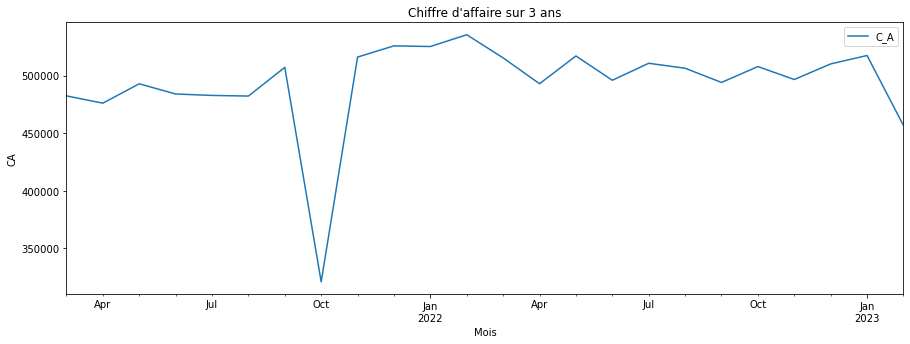

In [71]:
Lapage_y3.groupby(pd.Grouper(key='date_l', axis=0, freq='M')).sum().plot(figsize=(15,5))
plt.xlabel('Mois')
plt.ylabel('CA')
plt.title("Chiffre d'affaire sur 3 ans")
plt.show()

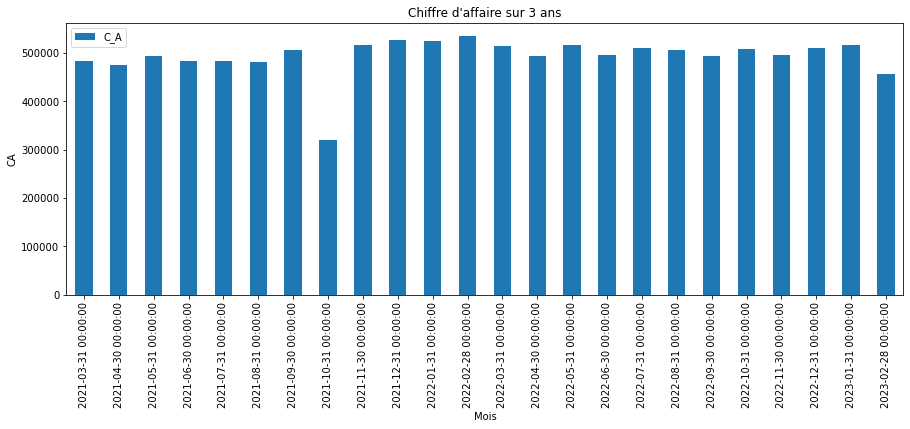

In [72]:
Lapage_y3.groupby(pd.Grouper(key='date_l', axis=0, freq='M')).sum().plot(kind="bar", figsize=(15,5))
plt.xlabel('Mois')
plt.ylabel('CA')
plt.title("Chiffre d'affaire sur 3 ans")
plt.show()

# Vente en fonction de la tranches d'Age

In [73]:
Lapage.head()

,id_prod,date_l,session_id,client_id,C_A,categ,sex,Age,year,month
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,37,2022,5
1,0_1518,2021-07-20,s_64849,c_103,4.18,0.0,f,37,2021,7
2,0_1518,2022-08-20,s_255965,c_103,4.18,0.0,f,37,2022,8
3,0_1418,2022-06-18,s_225411,c_103,8.57,0.0,f,37,2022,6
4,0_1418,2021-08-18,s_77214,c_103,8.57,0.0,f,37,2021,8


In [74]:
Lapage["Age"].unique().min()

19

In [75]:
Lapage["Age"].unique().max()

94

<AxesSubplot:>

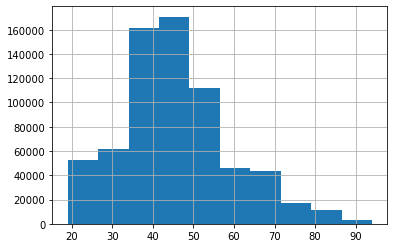

In [76]:
Lapage['Age'].hist()

In [77]:
#Création de tranche d'âge
bin_labels=labels=['15 to 24','25 to 34','35 to 44', '45 to 54', '55 to 64','65 to 74', '75 to 84', '85 to 100']

Lapage['Age_Range'] = pd.cut(x=Lapage['Age'],bins=[14,24,34,44,54, 64, 74, 84, 100],labels=bin_labels)
Lapage.head()

,id_prod,date_l,session_id,client_id,C_A,categ,sex,Age,year,month,Age_Range
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,37,2022,5,35 to 44
1,0_1518,2021-07-20,s_64849,c_103,4.18,0.0,f,37,2021,7,35 to 44
2,0_1518,2022-08-20,s_255965,c_103,4.18,0.0,f,37,2022,8,35 to 44
3,0_1418,2022-06-18,s_225411,c_103,8.57,0.0,f,37,2022,6,35 to 44
4,0_1418,2021-08-18,s_77214,c_103,8.57,0.0,f,37,2021,8,35 to 44


In [78]:
Lapage_Age_Range = Lapage.copy()
Lapage_Age_Range.set_index("Age_Range", inplace=True)
Lapage_Age_Range.drop(columns=["categ", "Age", "year", "month"], inplace=True)
Lapage_Age_Range.head()

,id_prod,date_l,session_id,client_id,C_A,sex
Age_Range,,,,,,
35 to 44,0_1518,2022-05-20,s_211425,c_103,4.18,f
35 to 44,0_1518,2021-07-20,s_64849,c_103,4.18,f
35 to 44,0_1518,2022-08-20,s_255965,c_103,4.18,f
35 to 44,0_1418,2022-06-18,s_225411,c_103,8.57,f
35 to 44,0_1418,2021-08-18,s_77214,c_103,8.57,f


In [79]:
Lapage_Age_Range.groupby('Age_Range').sum()

,C_A
Age_Range,
15 to 24,1804390.04
25 to 34,2169074.75
35 to 44,3113186.74
45 to 54,2301978.61
55 to 64,1318421.01
65 to 74,786360.72
75 to 84,283137.49
85 to 100,77179.32


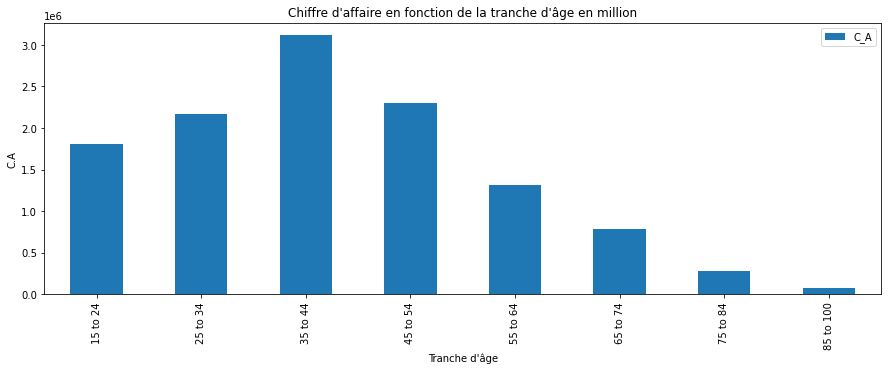

In [80]:
Lapage_Age_Range.groupby('Age_Range').sum().plot(kind="bar", figsize=(15,5))
plt.xlabel("Tranche d'âge")
plt.ylabel('C.A')
plt.title("Chiffre d'affaire en fonction de la tranche d'âge en million")
plt.show()

In [81]:
Lapage_Age_Range.rename(columns={"C_A":"PM"}, inplace=True)

In [82]:
Lapage_Age_Range.groupby('Age_Range').mean()

,PM
Age_Range,
15 to 24,41.952803
25 to 34,24.678584
35 to 44,13.204170
45 to 54,13.912767
55 to 64,16.806948
65 to 74,16.714010
75 to 84,16.762624
85 to 100,16.803684


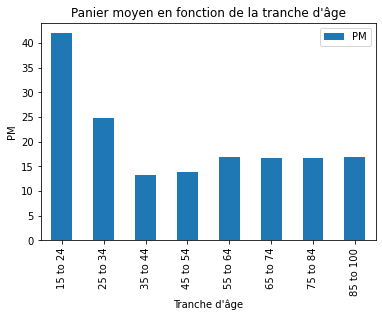

In [83]:
Lapage_Age_Range.groupby('Age_Range').mean().plot(kind="bar")
plt.xlabel("Tranche d'âge")
plt.ylabel('PM')
plt.title("Panier moyen en fonction de la tranche d'âge")
plt.show()

In [84]:
Lapage_Age_Range = Lapage.copy()
#suppresion de colonnes pour se focaliser sur l'âge, le CA et l id du client
Lapage_Age_Range.drop(columns=["id_prod", "session_id","date_l","categ", "sex","year", "month"], inplace=True)
Lapage_Age_Range.groupby(by ="client_id").mean().sort_values(by="Age")
Lapage_Age_Range.head()

,client_id,C_A,Age,Age_Range
0,c_103,4.18,37,35 to 44
1,c_103,4.18,37,35 to 44
2,c_103,4.18,37,35 to 44
3,c_103,8.57,37,35 to 44
4,c_103,8.57,37,35 to 44


In [85]:
corr_age_panier = Lapage_Age_Range.groupby(by=['client_id','Age','C_A']).mean().reset_index().sort_values(by='Age')

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [86]:
corr_age_panier.head()

,client_id,Age,C_A
61775,c_296,19,12.99
169597,c_6378,19,0.97
169598,c_6378,19,4.99
169599,c_6378,19,7.41
169600,c_6378,19,9.99


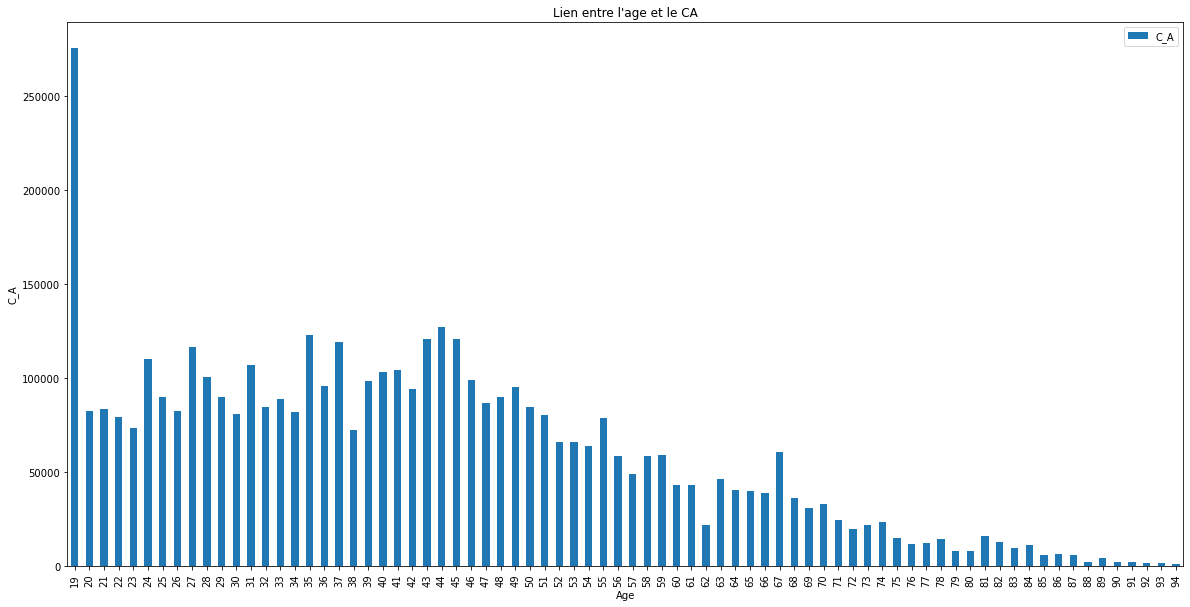

In [87]:
corr_age_panier.groupby('Age').sum().plot(kind="bar", figsize=(20,10))
plt.xlabel("Age")
plt.ylabel('C_A')
plt.title("Lien entre l'age et le CA")
plt.show()

In [88]:
r, p = st.pearsonr(corr_age_panier['Age'],corr_age_panier['C_A'])
print('Pearson: ',r)
print('P-Value: ',p)

Pearson:  -0.21255794486683235
P-Value:  0.0


# Nombre de Vente de Livre

In [89]:
Lapage["id_prod"].count()

679111

In [90]:
Lapage.groupby(by="month").count()

,id_prod,date_l,session_id,client_id,C_A,categ,sex,Age,year,Age_Range
month,,,,,,,,,,
1,58281,58281,58281,58281,58281,58281,58281,58281,58281,58281
2,55139,55139,55139,55139,55139,55139,55139,55139,55139,55139
3,58297,58297,58297,58297,58297,58297,58297,58297,58297,58297
4,56045,56045,56045,56045,56045,56045,56045,56045,56045,56045
5,58260,58260,58260,58260,58260,58260,58260,58260,58260,58260
6,55354,55354,55354,55354,55354,55354,55354,55354,55354,55354
7,53408,53408,53408,53408,53408,53408,53408,53408,53408,53408
8,54194,54194,54194,54194,54194,54194,54194,54194,54194,54194
9,61620,61620,61620,61620,61620,61620,61620,61620,61620,61620


In [91]:
Nombre_de_livre_M = Lapage.groupby(by="month").count()
Nombre_de_livre_M.rename(columns={"id_prod":"Livre"}, inplace=True)
Nombre_de_livre_M.head()

,Livre,date_l,session_id,client_id,C_A,categ,sex,Age,year,Age_Range
month,,,,,,,,,,
1,58281,58281,58281,58281,58281,58281,58281,58281,58281,58281
2,55139,55139,55139,55139,55139,55139,55139,55139,55139,55139
3,58297,58297,58297,58297,58297,58297,58297,58297,58297,58297
4,56045,56045,56045,56045,56045,56045,56045,56045,56045,56045
5,58260,58260,58260,58260,58260,58260,58260,58260,58260,58260


In [92]:
Nombre_de_livre_M.drop(columns=["date_l", "Age", "year", "Age_Range", "session_id", "categ", "client_id", "C_A", "sex"], inplace=True)
Nombre_de_livre_M.head()

,Livre
month,
1,58281
2,55139
3,58297
4,56045
5,58260


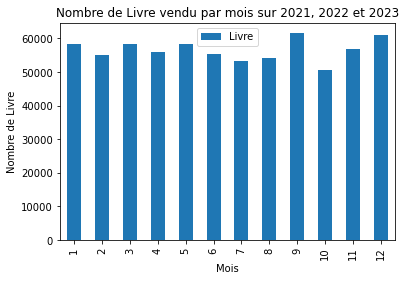

In [93]:
Nombre_de_livre_M.plot(kind="bar")
plt.xlabel("Mois")
plt.ylabel('Nombre de Livre')
plt.title("Nombre de Livre vendu par mois sur 2021, 2022 et 2023")
plt.show()

In [94]:
Nombre_de_livre_M_2021=Lapage_2021.groupby(by="month").count()
Nombre_de_livre_M_2021.rename(columns={"id_prod":"Livre"}, inplace=True)
Nombre_de_livre_M_2021.drop(columns=["date_l", "session_id", "client_id", "C_A", "sex"], inplace=True)
Nombre_de_livre_M_2021.head()


,Livre
month,
3,28601
4,28443
5,28285
6,26850
7,24738


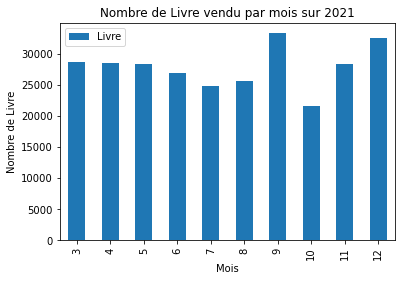

In [95]:
Nombre_de_livre_M_2021.plot(kind="bar")
plt.xlabel("Mois")
plt.ylabel('Nombre de Livre')
plt.title("Nombre de Livre vendu par mois sur 2021")
plt.show()

In [96]:
Nombre_de_livre_M_2022=Lapage_2022.groupby(by="month").count()
Nombre_de_livre_M_2022.rename(columns={"id_prod":"Livre"}, inplace=True)
Nombre_de_livre_M_2022.drop(columns=["date_l", "session_id", "client_id", "C_A", "sex"], inplace=True)
Nombre_de_livre_M_2022.head()

,Livre
month,
1,29343
2,29594
3,29696
4,27602
5,29975


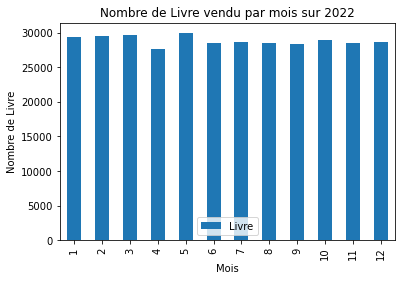

In [97]:
Nombre_de_livre_M_2022.plot(kind="bar")
plt.xlabel("Mois")
plt.ylabel('Nombre de Livre')
plt.title("Nombre de Livre vendu par mois sur 2022")
plt.show()

In [98]:
Nombre_de_livre_M_2023=Lapage_2023.groupby(by="month").count()
Nombre_de_livre_M_2023.rename(columns={"id_prod":"Livre"}, inplace=True)
Nombre_de_livre_M_2023.drop(columns=["date_l", "session_id", "client_id", "C_A", "sex"], inplace=True)
Nombre_de_livre_M_2023.head()

,Livre
month,
1,28938
2,25545


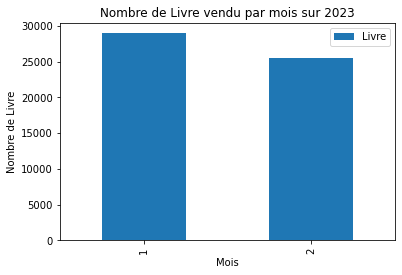

In [99]:
Nombre_de_livre_M_2023.plot(kind="bar")
plt.xlabel("Mois")
plt.ylabel('Nombre de Livre')
plt.title("Nombre de Livre vendu par mois sur 2023")
plt.show()

In [100]:
Nombre_de_livre_M_2021.mean()


Livre    27824.8
dtype: float64

In [101]:
Nombre_de_livre_M_2022.mean()

Livre    28865.0
dtype: float64

In [102]:
Nombre_de_livre_M_2023.mean()

Livre    27241.5
dtype: float64

# Nombre de livre vendu Annuellement

In [103]:
Nombre_de_livre_Annuelle=Lapage_y.groupby(pd.Grouper(key='date_l', axis=0, freq='Y')).count()
Nombre_de_livre_Annuelle.drop(columns=["session_id", "client_id", "C_A","sex","year"], inplace=True)
Nombre_de_livre_Annuelle.head()

,id_prod
date_l,
2021-12-31,278248
2022-12-31,346380
2023-12-31,54483


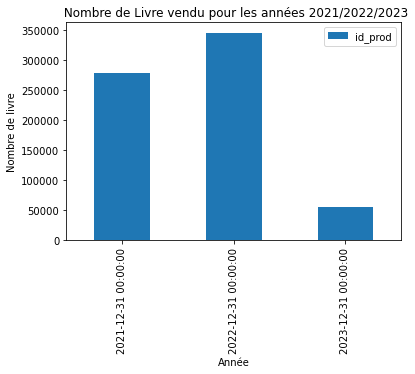

In [104]:
Nombre_de_livre_Annuelle.plot(kind="bar")
plt.xlabel("Année")
plt.ylabel('Nombre de livre')
plt.title(" Nombre de Livre vendu pour les années 2021/2022/2023")
plt.show()

# Vente Mensuelle 

In [105]:
ventes_mensuel = Lapage.groupby(pd.Grouper(key='date_l', axis=0, freq='M')).count()
ventes_mensuel.head()

,id_prod,session_id,client_id,C_A,categ,sex,Age,year,month,Age_Range
date_l,,,,,,,,,,
2021-03-31,28601,28601,28601,28601,28601,28601,28601,28601,28601,28601
2021-04-30,28443,28443,28443,28443,28443,28443,28443,28443,28443,28443
2021-05-31,28285,28285,28285,28285,28285,28285,28285,28285,28285,28285
2021-06-30,26850,26850,26850,26850,26850,26850,26850,26850,26850,26850
2021-07-31,24738,24738,24738,24738,24738,24738,24738,24738,24738,24738


In [106]:
ventes_mensuel = ventes_mensuel.reset_index()
ventes_mensuel.set_index("date_l", inplace=True)
ventes_mensuel.drop(columns=["id_prod","session_id", "client_id","sex","year", "categ", "Age", "month", "Age_Range"], inplace=True)
ventes_mensuel.head()

,C_A
date_l,
2021-03-31,28601
2021-04-30,28443
2021-05-31,28285
2021-06-30,26850
2021-07-31,24738


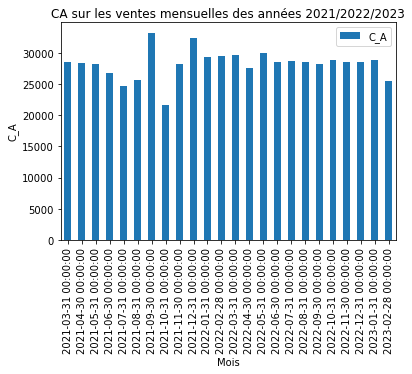

In [107]:
ventes_mensuel.plot(kind="bar")
plt.xlabel("Mois")
plt.ylabel('C_A')
plt.title("CA sur les ventes mensuelles des années 2021/2022/2023")
plt.show()

In [108]:
ventes_mensuel_2021 = Lapage_2021.groupby(pd.Grouper(key='date_l', axis=0, freq='M')).count()

ventes_mensuel_2021.drop(columns=["id_prod","session_id", "client_id","sex", "month"], inplace=True)

ventes_mensuel_2021.head()

,C_A
date_l,
2021-03-31,28601
2021-04-30,28443
2021-05-31,28285
2021-06-30,26850
2021-07-31,24738


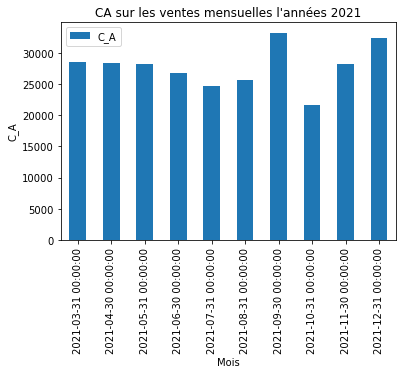

In [109]:
ventes_mensuel_2021.plot(kind="bar")

plt.xlabel("Mois")
plt.ylabel('C_A')
plt.title("CA sur les ventes mensuelles l'années 2021")
plt.show()

In [110]:
ventes_mensuel_2022 = Lapage_2022.groupby(pd.Grouper(key='date_l', axis=0, freq='M')).count()
ventes_mensuel_2022.drop(columns=["id_prod","session_id", "client_id","sex", "month"], inplace=True)

ventes_mensuel_2022.head()

,C_A
date_l,
2022-01-31,29343
2022-02-28,29594
2022-03-31,29696
2022-04-30,27602
2022-05-31,29975


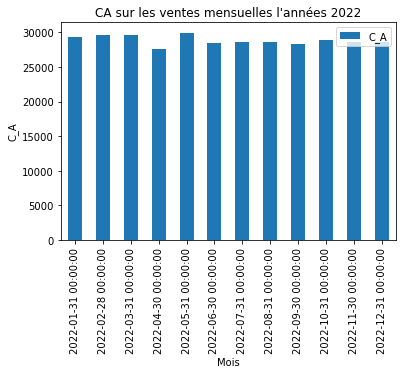

In [111]:
ventes_mensuel_2022.plot(kind="bar")

plt.xlabel("Mois")
plt.ylabel('C_A')
plt.title("CA sur les ventes mensuelles l'années 2022")
plt.show()

In [112]:
ventes_mensuel_2023 = Lapage_2023.groupby(pd.Grouper(key='date_l', axis=0, freq='M')).count()
ventes_mensuel_2023.drop(columns=["id_prod","session_id", "client_id","sex", "month"], inplace=True)

ventes_mensuel_2023.head()

,C_A
date_l,
2023-01-31,28938
2023-02-28,25545


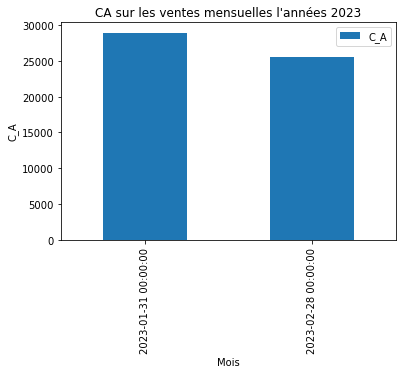

In [113]:
ventes_mensuel_2023.plot(kind="bar")

plt.xlabel("Mois")
plt.ylabel('C_A')
plt.title("CA sur les ventes mensuelles l'années 2023")
plt.show()

# Vente sur la tranches d'âge

In [114]:
ventes_T_Age = Lapage.copy()
ventes_T_Age.drop(columns=["id_prod", "date_l", "session_id", "client_id", "categ","sex","Age", "year", "month", ], inplace=True)

ventes_T_Age

,C_A,Age_Range
0,4.18,35 to 44
1,4.18,35 to 44
2,4.18,35 to 44
3,8.57,35 to 44
4,8.57,35 to 44
...,...,...
679106,181.99,15 to 24
679107,19.85,55 to 64
679108,19.85,55 to 64
679109,100.99,25 to 34


In [115]:
ventes_T_Age.groupby('Age_Range').sum()

,C_A
Age_Range,
15 to 24,1804390.04
25 to 34,2169074.75
35 to 44,3113186.74
45 to 54,2301978.61
55 to 64,1318421.01
65 to 74,786360.72
75 to 84,283137.49
85 to 100,77179.32


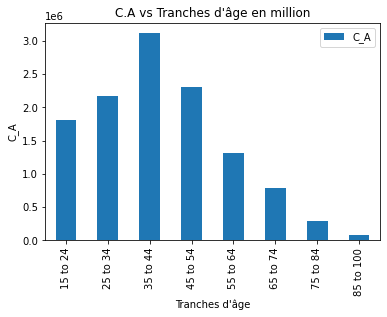

In [116]:
ventes_T_Age.groupby('Age_Range').sum().plot(kind="bar")
plt.title("C.A vs Tranches d'âge en million")
plt.xlabel("Tranches d'âge")
plt.ylabel('C_A')

plt.show()

# Evolution des Ventes

In [117]:
Evo_ventes_mensuel = Lapage.groupby(pd.Grouper(key='date_l', axis=0, freq='M')).count()
Evo_ventes_mensuel.head()

,id_prod,session_id,client_id,C_A,categ,sex,Age,year,month,Age_Range
date_l,,,,,,,,,,
2021-03-31,28601,28601,28601,28601,28601,28601,28601,28601,28601,28601
2021-04-30,28443,28443,28443,28443,28443,28443,28443,28443,28443,28443
2021-05-31,28285,28285,28285,28285,28285,28285,28285,28285,28285,28285
2021-06-30,26850,26850,26850,26850,26850,26850,26850,26850,26850,26850
2021-07-31,24738,24738,24738,24738,24738,24738,24738,24738,24738,24738


In [118]:
Evo_ventes_mensuel['rolling_mean'] = Evo_ventes_mensuel.C_A.rolling(window = 2).mean()
Evo_ventes_mensuel=Evo_ventes_mensuel.copy()
Evo_ventes_mensuel.drop(columns=["id_prod","session_id", "client_id", "categ","sex","Age", "year", "month", "Age_Range"], inplace=True)
Evo_ventes_mensuel.head()

,C_A,rolling_mean
date_l,,
2021-03-31,28601,NaN
2021-04-30,28443,28522.0
2021-05-31,28285,28364.0
2021-06-30,26850,27567.5
2021-07-31,24738,25794.0


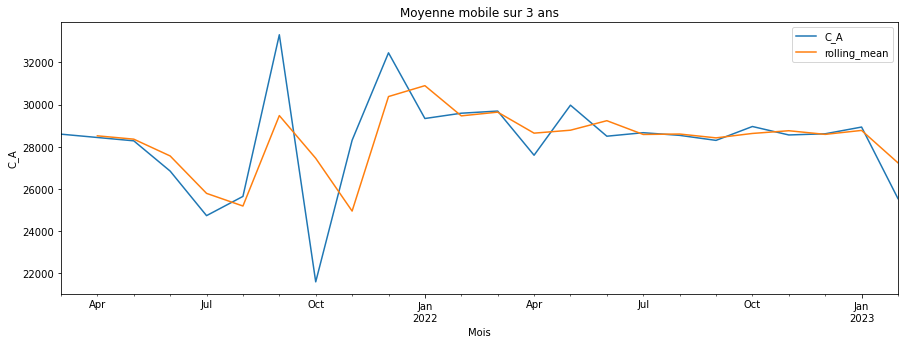

In [119]:
Evo_ventes_mensuel.plot(figsize=(15,5))
plt.xlabel("Mois")
plt.ylabel('C_A')
plt.title("Moyenne mobile sur 3 ans")
plt.show()

In [120]:
ventes_mensuel_2021['rolling_mean'] = ventes_mensuel_2021.C_A.rolling(window = 2).mean()
Evo_ventes_mensuel_2021=ventes_mensuel_2021.copy()

Evo_ventes_mensuel_2021.head()

,C_A,rolling_mean
date_l,,
2021-03-31,28601,NaN
2021-04-30,28443,28522.0
2021-05-31,28285,28364.0
2021-06-30,26850,27567.5
2021-07-31,24738,25794.0


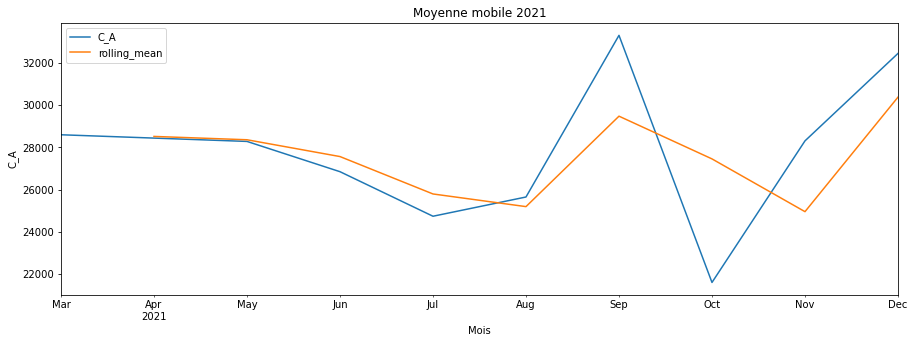

In [121]:
Evo_ventes_mensuel_2021.plot(figsize=(15,5))
plt.xlabel("Mois")
plt.ylabel('C_A')
plt.title("Moyenne mobile 2021")
plt.show()

In [122]:
ventes_mensuel_2022['rolling_mean'] = ventes_mensuel_2022.C_A.rolling(window = 2).mean()
Evo_ventes_mensuel_2022=ventes_mensuel_2022.copy()

Evo_ventes_mensuel_2022.head()

,C_A,rolling_mean
date_l,,
2022-01-31,29343,NaN
2022-02-28,29594,29468.5
2022-03-31,29696,29645.0
2022-04-30,27602,28649.0
2022-05-31,29975,28788.5


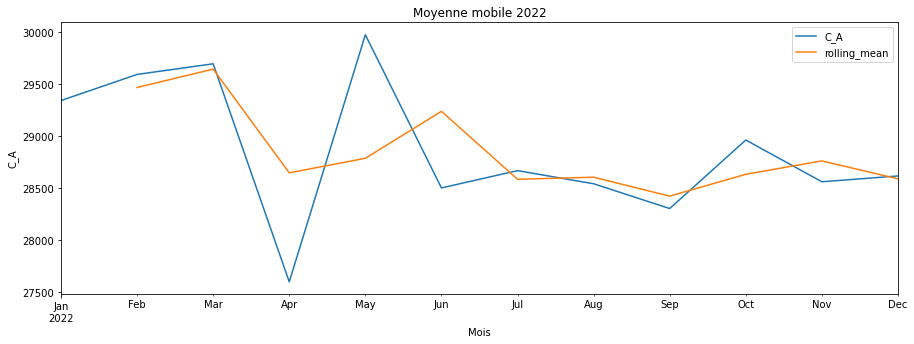

In [123]:
Evo_ventes_mensuel_2022.plot( figsize=(15,5))
plt.xlabel("Mois")
plt.ylabel('C_A')
plt.title("Moyenne mobile 2022")
plt.show()

In [124]:
ventes_mensuel_2023['rolling_mean'] = ventes_mensuel_2023.C_A.rolling(window = 2).mean()
Evo_ventes_mensuel_2023=ventes_mensuel_2023.copy()
Evo_ventes_mensuel_2023.head()

,C_A,rolling_mean
date_l,,
2023-01-31,28938,NaN
2023-02-28,25545,27241.5


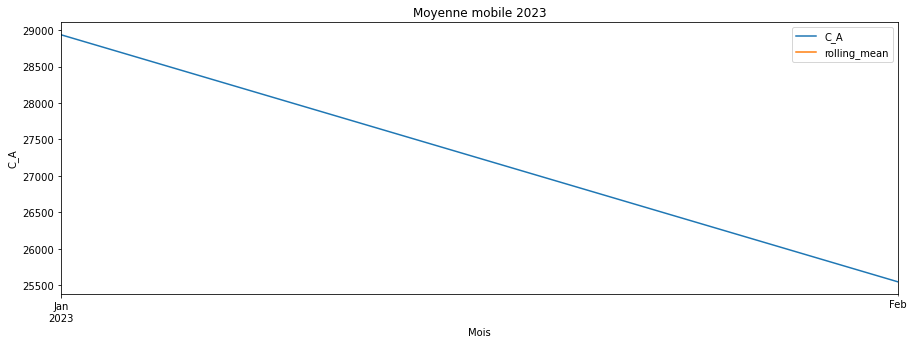

In [125]:
Evo_ventes_mensuel_2023.plot(figsize=(15,5))
plt.xlabel("Mois")
plt.ylabel('C_A')
plt.title("Moyenne mobile 2023")
plt.show()

In [126]:
Evo_ventes_mensuel_2021

,C_A,rolling_mean
date_l,,
2021-03-31,28601,NaN
2021-04-30,28443,28522.0
2021-05-31,28285,28364.0
2021-06-30,26850,27567.5
2021-07-31,24738,25794.0
2021-08-31,25650,25194.0
2021-09-30,33314,29482.0
2021-10-31,21599,27456.5
2021-11-30,28311,24955.0


In [127]:
Evo_ventes_mensuel_2021 = Evo_ventes_mensuel_2021.reset_index()
Evo_ventes_mensuel_2021.rename(columns={"C_A":"C_A_2021"}, inplace=True)

Evo_ventes_mensuel_2021.drop(columns=['rolling_mean'], inplace = True)
Evo_ventes_mensuel_2021

,date_l,C_A_2021
0,2021-03-31,28601
1,2021-04-30,28443
2,2021-05-31,28285
3,2021-06-30,26850
4,2021-07-31,24738
5,2021-08-31,25650
6,2021-09-30,33314
7,2021-10-31,21599
8,2021-11-30,28311
9,2021-12-31,32457


In [128]:
Evo_ventes_mensuel_2022 = Evo_ventes_mensuel_2022.reset_index()
Evo_ventes_mensuel_2022.rename(columns={"C_A":"C_A_2022"}, inplace=True)

Evo_ventes_mensuel_2022.drop(columns=['rolling_mean'], inplace = True)
Evo_ventes_mensuel_2022

,date_l,C_A_2022
0,2022-01-31,29343
1,2022-02-28,29594
2,2022-03-31,29696
3,2022-04-30,27602
4,2022-05-31,29975
5,2022-06-30,28504
6,2022-07-31,28670
7,2022-08-31,28544
8,2022-09-30,28306
9,2022-10-31,28964


In [129]:
evo = pd.concat([Evo_ventes_mensuel_2021,Evo_ventes_mensuel_2022])
evo

,date_l,C_A_2021,C_A_2022
0,2021-03-31,28601.0,NaN
1,2021-04-30,28443.0,NaN
2,2021-05-31,28285.0,NaN
3,2021-06-30,26850.0,NaN
4,2021-07-31,24738.0,NaN
5,2021-08-31,25650.0,NaN
6,2021-09-30,33314.0,NaN
7,2021-10-31,21599.0,NaN
8,2021-11-30,28311.0,NaN
9,2021-12-31,32457.0,NaN


In [130]:
evo['month']=evo['date_l'].dt.month
evo.head()

,date_l,C_A_2021,C_A_2022,month
0,2021-03-31,28601.0,NaN,3
1,2021-04-30,28443.0,NaN,4
2,2021-05-31,28285.0,NaN,5
3,2021-06-30,26850.0,NaN,6
4,2021-07-31,24738.0,NaN,7


In [131]:
evo.drop(columns=['date_l'], inplace = True)
evo.set_index("month", inplace=True)
evo.head()

,C_A_2021,C_A_2022
month,,
3,28601.0,NaN
4,28443.0,NaN
5,28285.0,NaN
6,26850.0,NaN
7,24738.0,NaN


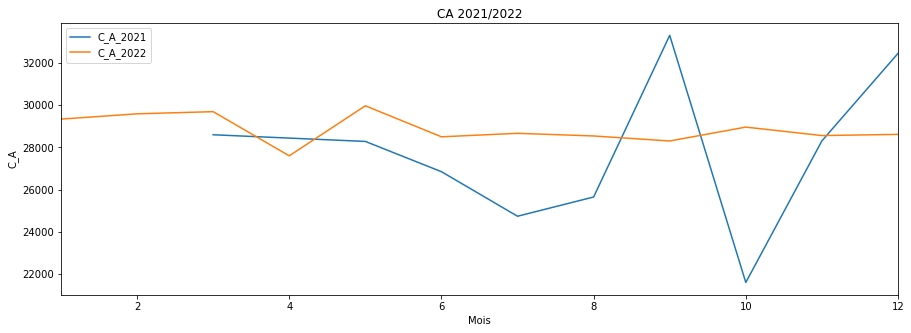

In [132]:
evo.plot(figsize=(15,5))

plt.xlabel("Mois")
plt.ylabel('C_A')
plt.title("CA 2021/2022")
plt.xlim(1,12)
plt.show()

# Fréquence

In [133]:
Lapage.head()

,id_prod,date_l,session_id,client_id,C_A,categ,sex,Age,year,month,Age_Range
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,37,2022,5,35 to 44
1,0_1518,2021-07-20,s_64849,c_103,4.18,0.0,f,37,2021,7,35 to 44
2,0_1518,2022-08-20,s_255965,c_103,4.18,0.0,f,37,2022,8,35 to 44
3,0_1418,2022-06-18,s_225411,c_103,8.57,0.0,f,37,2022,6,35 to 44
4,0_1418,2021-08-18,s_77214,c_103,8.57,0.0,f,37,2021,8,35 to 44


In [134]:
#Agrégation des données selon l'âge client
#Le nombre d'achat mensuel est obtenu à partir du comptage des sessions clients par mois
#Hypothèse 1 id_session = 1 transation
customers_freq = Lapage.groupby('Age').count().reset_index()
customers_freq = customers_freq[['Age', 'client_id']]

#Création d'une variable fréquence 'f'
customers_freq['f'] = customers_freq['client_id'] / sum(customers_freq['client_id'])
customers_freq.sort_values(by='Age', ascending=False).head(10)

,Age,client_id,f
75,94,201,0.000296
74,93,226,0.000333
73,92,170,0.000250
72,91,311,0.000458
71,90,326,0.000480
70,89,555,0.000817
69,88,271,0.000399
68,87,757,0.001115
67,86,942,0.001387
66,85,834,0.001228


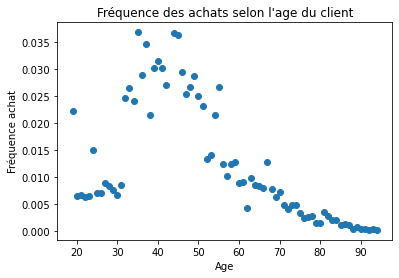

In [135]:
plt.plot(customers_freq[customers_freq.f < .05].Age, customers_freq[customers_freq.f < .05].f, 'o')
plt.xlabel('Age')
plt.ylabel('Fréquence achat')
plt.title('Fréquence des achats selon l\'age du client')

plt.show()

In [136]:
r, p = st.pearsonr(customers_freq.Age, customers_freq.f)
print('Pearson: ',r)
print('P-Value: ',p)

Pearson:  -0.5337344271238332
P-Value:  6.876677470343486e-07


# Panier Moyen

In [137]:
Panier_M = Lapage.copy()
Panier_M.rename(columns={"C_A":"P_M"}, inplace=True)
Panier_M.drop(columns=["id_prod","session_id","sex", "categ", "year", "month"], inplace=True)
Panier_M.groupby(by ="client_id").mean().reset_index().sort_values(by="Age")


,client_id,P_M,Age
5265,c_5749,18.185714,19.0
8245,c_8437,36.179091,19.0
1212,c_2090,35.370286,19.0
4501,c_5059,28.244000,19.0
316,c_1284,25.194615,19.0
...,...,...,...
2463,c_3218,11.581667,93.0
6910,c_7232,17.853598,93.0
5288,c_577,15.912696,94.0
4770,c_5302,14.838378,94.0


In [138]:
PM = Panier_M.groupby('Age').mean()
PM.reset_index(inplace=True)
PM

,Age,P_M
0,19,40.201577
1,20,40.767737
2,21,40.178305
3,22,41.979704
4,23,37.391339
...,...,...
71,90,16.117638
72,91,16.216045
73,92,16.561471
74,93,17.760487


Text(0, 0.5, 'PM')

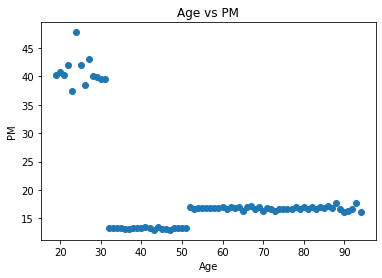

In [139]:
plt.scatter(PM["Age"], PM["P_M"])
plt.title('Age vs PM')
plt.xlabel('Age')
plt.ylabel('PM')

In [140]:
r, p = st.pearsonr(PM['Age'],PM['P_M'])
print('Pearson: ',r)
print('P-Value: ',p)

Pearson:  -0.5478614363791428
P-Value:  3.0190378158491196e-07


In [141]:
Anova

NameError: name 'Anova' is not defined

In [142]:
Panier_M.drop(columns=["date_l","client_id", "Age"], inplace=True)
Panier_M.head()

,P_M,Age_Range
0,4.18,35 to 44
1,4.18,35 to 44
2,4.18,35 to 44
3,8.57,35 to 44
4,8.57,35 to 44


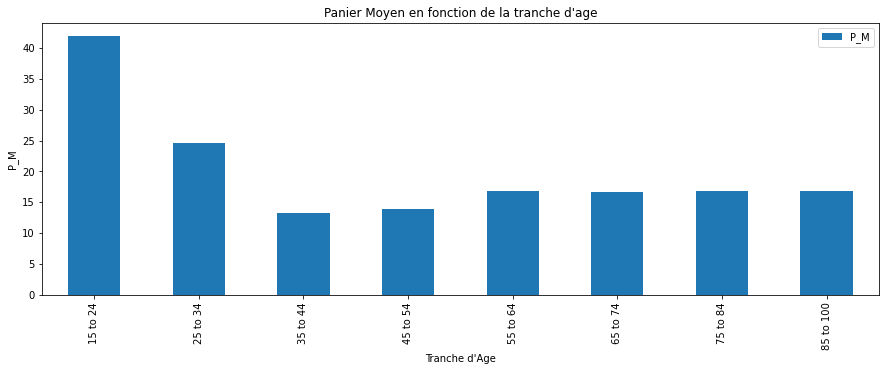

In [143]:
Panier_M.groupby("Age_Range").mean().plot(kind="bar", figsize=(15,5))
plt.xlabel("Tranche d'Age")
plt.ylabel('P_M')
plt.title("Panier Moyen en fonction de la tranche d'age")
plt.show()

# Catégorie

In [144]:
Lapage.head()

,id_prod,date_l,session_id,client_id,C_A,categ,sex,Age,year,month,Age_Range
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,37,2022,5,35 to 44
1,0_1518,2021-07-20,s_64849,c_103,4.18,0.0,f,37,2021,7,35 to 44
2,0_1518,2022-08-20,s_255965,c_103,4.18,0.0,f,37,2022,8,35 to 44
3,0_1418,2022-06-18,s_225411,c_103,8.57,0.0,f,37,2022,6,35 to 44
4,0_1418,2021-08-18,s_77214,c_103,8.57,0.0,f,37,2021,8,35 to 44


In [145]:
Categorie= Lapage.copy()

Categorie.drop(columns=["session_id", "client_id", "id_prod", "date_l", "year","month", "Age_Range", "sex", "Age"], inplace=True)

Categorie

,C_A,categ
0,4.18,0.0
1,4.18,0.0
2,4.18,0.0
3,8.57,0.0
4,8.57,0.0
...,...,...
679106,181.99,2.0
679107,19.85,0.0
679108,19.85,0.0
679109,100.99,2.0


In [146]:
Categorie.groupby("categ").sum()

,C_A
categ,
0.0,4419730.97
1.0,4653722.69
2.0,2780275.02


In [147]:
categ_group = Categorie.groupby("categ").sum().reset_index()

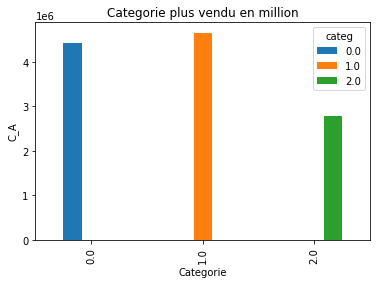

In [148]:
categ_group.pivot_table('C_A', index='categ',
                    columns='categ', aggfunc='sum').plot(kind='bar')
plt.title('Categorie plus vendu en million')
plt.xlabel("Categorie")
plt.ylabel('C_A');

# Catégorie par rapport à l'âge

In [149]:
Categorie_A= Lapage.copy()

Categorie_A.drop(columns=["session_id", "client_id", "id_prod", "date_l", "year","month", "Age_Range", "sex", "C_A"], inplace=True)

Categorie_A

,categ,Age
0,0.0,37
1,0.0,37
2,0.0,37
3,0.0,37
4,0.0,37
...,...,...
679106,2.0,22
679107,0.0,63
679108,0.0,63
679109,2.0,31


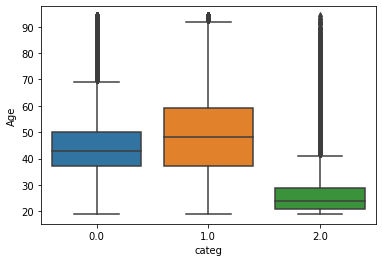

In [215]:
ax = sns.boxplot(x='categ', y='Age', data=Categorie_A)
plt.show()

In [156]:
#Anova
model = ols('Age ~ categ', data= Categorie_A).fit() #quantitatif
anova_table = sm.stats.anova_lm(model,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
categ,1.232600e+06,1.0,6754.872084,0.0
Residual,1.239209e+08,679109.0,NaN,NaN


In [157]:
Categorie_A["count"] = np.where(Categorie_A["categ"]=="f","1","1")
Categorie_A

,categ,Age,count
0,0.0,37,1
1,0.0,37,1
2,0.0,37,1
3,0.0,37,1
4,0.0,37,1
...,...,...,...
679106,2.0,22,1
679107,0.0,63,1
679108,0.0,63,1
679109,2.0,31,1


In [158]:
Categorie_A.groupby(['categ','Age'])['count'].count()

categ  Age
0.0    19     3418
       20      909
       21     1016
       22      974
       23     1114
              ... 
2.0    90        1
       91        2
       92        2
       93        2
       94        1
Name: count, Length: 228, dtype: int64

In [159]:
Categorie_A_0 = Categorie_A.copy()
Categorie_A_0.groupby(["categ", "Age"])["count"].count()
Categorie_A_0.set_index('categ', inplace = True)
Categorie_A_0

,Age,count
categ,,
0.0,37,1
0.0,37,1
0.0,37,1
0.0,37,1
0.0,37,1
...,...,...
2.0,22,1
0.0,63,1
0.0,63,1


In [160]:
Categorie_A_0.drop(index=1.0, inplace=True)
Categorie_A_0.drop(index=2.0, inplace=True)
Categorie_A_0

,Age,count
categ,,
0.0,37,1
0.0,37,1
0.0,37,1
0.0,37,1
0.0,37,1
...,...,...
0.0,63,1
0.0,63,1
0.0,53,1


In [161]:
Categorie_A_0.groupby(['categ','Age'])['count'].count()

categ  Age
0.0    19     3418
       20      909
       21     1016
       22      974
       23     1114
              ... 
       90      142
       91      132
       92       77
       93       75
       94       78
Name: count, Length: 76, dtype: int64

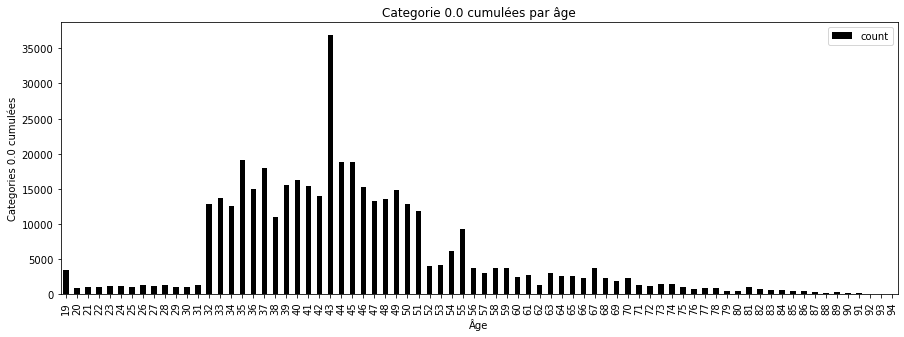

In [162]:
Categorie_A_0.groupby("Age").count().plot(kind = "bar", color='0', figsize=(15,5))
plt.title("Categorie 0.0 cumulées par âge")
plt.xlabel("Âge")
plt.ylabel('Categories 0.0 cumulées')
plt.show()

In [163]:
Categorie_A_1 = Categorie_A.copy()
Categorie_A_1.groupby(["categ", "Age"])["count"].count()
Categorie_A_1.set_index('categ', inplace = True)
Categorie_A_1

,Age,count
categ,,
0.0,37,1
0.0,37,1
0.0,37,1
0.0,37,1
0.0,37,1
...,...,...
2.0,22,1
0.0,63,1
0.0,63,1


In [164]:
Categorie_A_1.drop(index=0.0, inplace=True)
Categorie_A_1.drop(index=2.0, inplace=True)
Categorie_A_1

,Age,count
categ,,
1.0,37,1
1.0,37,1
1.0,37,1
1.0,37,1
1.0,37,1
...,...,...
1.0,62,1
1.0,62,1
1.0,66,1


In [165]:
Categorie_A_1.groupby(['categ','Age'])['count'].count()

categ  Age
1.0    19     5719
       20     1678
       21     1723
       22     1550
       23     1628
              ... 
       90      183
       91      177
       92       91
       93      149
       94      122
Name: count, Length: 76, dtype: int64

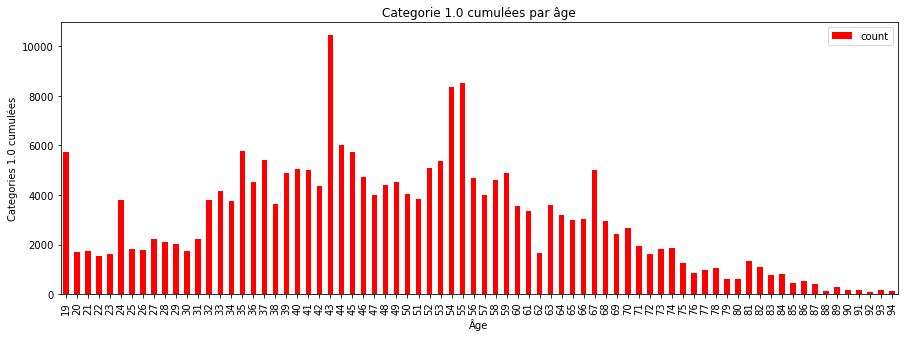

In [166]:
Categorie_A_1.groupby("Age").count().plot(kind = "bar", color='r', figsize=(15,5))
plt.title("Categorie 1.0 cumulées par âge")
plt.xlabel("Âge")
plt.ylabel('Categories 1.0 cumulées')
plt.show()

In [167]:
Categorie_A_2 = Categorie_A.copy()
Categorie_A_2.groupby(["categ", "Age"])["count"].count()
Categorie_A_2.set_index('categ', inplace = True)
Categorie_A_2

,Age,count
categ,,
0.0,37,1
0.0,37,1
0.0,37,1
0.0,37,1
0.0,37,1
...,...,...
2.0,22,1
0.0,63,1
0.0,63,1


In [168]:
Categorie_A_2.drop(index=0.0, inplace=True)
Categorie_A_2.drop(index=1.0, inplace=True)
Categorie_A_2

,Age,count
categ,,
2.0,61,1
2.0,61,1
2.0,45,1
2.0,45,1
2.0,52,1
...,...,...
2.0,20,1
2.0,22,1
2.0,22,1


In [169]:
Categorie_A_2.groupby(['categ','Age'])['count'].count()

categ  Age
2.0    19     6012
       20     1784
       21     1845
       22     1728
       23     1671
              ... 
       90        1
       91        2
       92        2
       93        2
       94        1
Name: count, Length: 76, dtype: int64

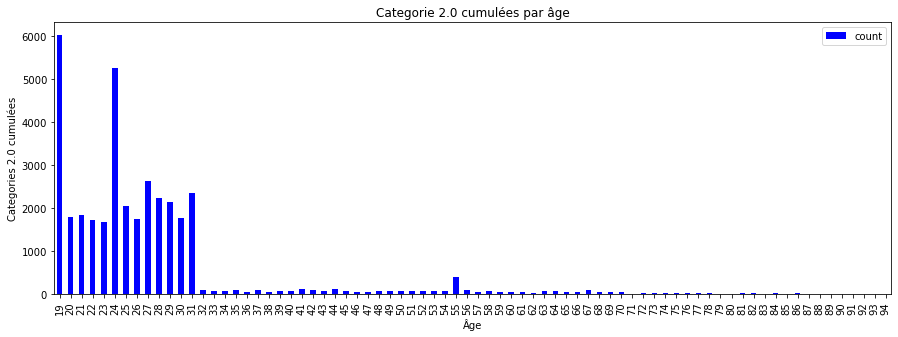

In [170]:
Categorie_A_2.groupby("Age").count().plot(kind = "bar", color='b', figsize=(15,5))
plt.title("Categorie 2.0 cumulées par âge")
plt.xlabel("Âge")
plt.ylabel('Categories 2.0 cumulées')
plt.show()

In [211]:
Categorie_A_2.reset_index(inplace=True)

In [212]:
Categorie_A_2.drop('count', axis=1)

,categ,Age
0,2.0,61
1,2.0,61
2,2.0,45
3,2.0,45
4,2.0,52
...,...,...
36478,2.0,20
36479,2.0,22
36480,2.0,22
36481,2.0,31


In [213]:
model = ols('Age ~ categ', data= Categorie_A_2).fit()
anova_table = sm.stats.anova_lm(model,typ=2)
anova_table

,sum_sq,df,F,PR(>F)
categ,2.649382e+07,1.0,275966.948579,0.0
Residual,3.502403e+06,36482.0,NaN,NaN


# Catégorie par tranches d'âge

In [174]:
Categorie_A.drop(columns='count', inplace=True)

In [175]:
Categorie_A['Age_Range'] = pd.cut(x=Categorie_A['Age'],bins=[14,24,34,44,54, 64, 74, 84, 100],labels=bin_labels)
Categorie_A.sort_values('Age')

,categ,Age,Age_Range
636267,0.0,19,15 to 24
339884,1.0,19,15 to 24
339885,1.0,19,15 to 24
339886,1.0,19,15 to 24
339887,2.0,19,15 to 24
...,...,...,...
355926,1.0,94,85 to 100
355927,1.0,94,85 to 100
355928,0.0,94,85 to 100
355922,0.0,94,85 to 100


In [176]:
Categorie_T_A = Categorie_A.groupby('Age_Range').count().reset_index()
Categorie_T_A.drop(columns=['Age'], inplace=True)
Categorie_T_A

,Age_Range,categ
0,15 to 24,43010
1,25 to 34,87893
2,35 to 44,235773
3,45 to 54,165458
4,55 to 64,78445
5,65 to 74,47048
6,75 to 84,16891
7,85 to 100,4593


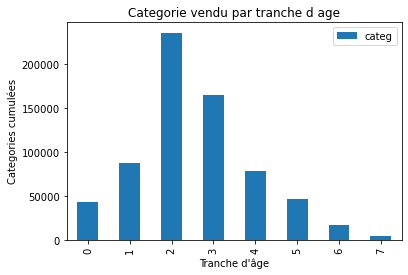

In [177]:
Categorie_T_A.plot(kind="bar")
plt.title('Categorie vendu par tranche d age')
plt.xlabel("Tranche d'âge")
plt.ylabel('Categories cumulées')

plt.show()

# Catégorie par rapport au sexe

In [180]:
Categorie_S= Lapage.copy()
Categorie_S.drop(columns=["session_id", "client_id", "id_prod", "date_l", "year","month", "Age_Range", "Age", "C_A"], inplace=True)

Categorie_S

,categ,sex
0,0.0,f
1,0.0,f
2,0.0,f
3,0.0,f
4,0.0,f
...,...,...
679106,2.0,f
679107,0.0,f
679108,0.0,f
679109,2.0,m


In [181]:
Categorie_S.groupby(["categ"]).count()

,sex
categ,
0.0,415459
1.0,227169
2.0,36483


In [182]:
Categorie_S.groupby(["sex"]).count()

,categ
sex,
f,338285
m,340826


In [183]:
Categorie_S.groupby(["categ","sex"]).count()
Categorie_S.groupby(["categ"]).count()

,sex
categ,
0.0,415459
1.0,227169
2.0,36483


In [184]:
Categorie_S.head()

,categ,sex
0,0.0,f
1,0.0,f
2,0.0,f
3,0.0,f
4,0.0,f


In [185]:
Categorie_S["count"] = np.where(Categorie_S["sex"]=="f","1","1")
Categorie_S

,categ,sex,count
0,0.0,f,1
1,0.0,f,1
2,0.0,f,1
3,0.0,f,1
4,0.0,f,1
...,...,...,...
679106,2.0,f,1
679107,0.0,f,1
679108,0.0,f,1
679109,2.0,m,1


In [186]:
categorie_sex = Categorie_S.groupby(["categ", "sex"])["count"].count()
categorie_sex.reset_index()
categorie_sex

categ  sex
0.0    f      206103
       m      209356
1.0    f      114899
       m      112270
2.0    f       17283
       m       19200
Name: count, dtype: int64

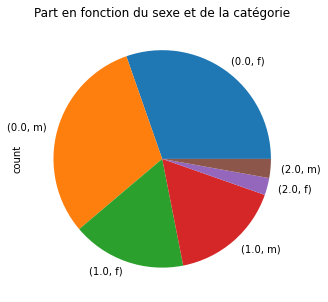

In [187]:
categorie_sex.plot(kind="pie",figsize=(15,5))

plt.title("Part en fonction du sexe et de la catégorie")

plt.show()

In [188]:
Categorie_S.groupby(["categ", "sex"])["count"].count()

categ  sex
0.0    f      206103
       m      209356
1.0    f      114899
       m      112270
2.0    f       17283
       m       19200
Name: count, dtype: int64

In [189]:
X = "sex" 
Y = "categ" 
cont = Categorie_S[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy() 
tx = Categorie_S[X].value_counts() 
ty = Categorie_S[Y].value_counts() 
cont = cont.astype(int)  
print(cont)

categ     0.0     1.0    2.0
sex                         
f      206103  114899  17283
m      209356  112270  19200


In [190]:
from scipy.stats import chi2_contingency

In [191]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)


In [192]:
print ('Chi2:',st_chi2.round(2)) 
print('Degré de liberté:', st_dof) 
print('P-Value:', st_p) 
print('Table théorique:') 
pd.DataFrame(st_exp.round(2))


Chi2: 147.12
Degré de liberté: 2
P-Value: 1.1310980597090762e-32
Table théorique:


,0,1,2
0,206952.25,113159.51,18173.25
1,208506.75,114009.49,18309.75


# Categorie vs Price

In [193]:
Lapage.head()
Lapage.rename(columns={'C_A':'price'}, inplace =True)
Lapage.head()

,id_prod,date_l,session_id,client_id,price,categ,sex,Age,year,month,Age_Range
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,37,2022,5,35 to 44
1,0_1518,2021-07-20,s_64849,c_103,4.18,0.0,f,37,2021,7,35 to 44
2,0_1518,2022-08-20,s_255965,c_103,4.18,0.0,f,37,2022,8,35 to 44
3,0_1418,2022-06-18,s_225411,c_103,8.57,0.0,f,37,2022,6,35 to 44
4,0_1418,2021-08-18,s_77214,c_103,8.57,0.0,f,37,2021,8,35 to 44


In [194]:
Categorie_P= Lapage.copy()
Categorie_P.drop(columns=["session_id", "client_id", "id_prod", "date_l", "year","month", "Age_Range", "Age", "sex"], inplace=True)
Categorie_P

,price,categ
0,4.18,0.0
1,4.18,0.0
2,4.18,0.0
3,8.57,0.0
4,8.57,0.0
...,...,...
679106,181.99,2.0
679107,19.85,0.0
679108,19.85,0.0
679109,100.99,2.0


<AxesSubplot:xlabel='categ', ylabel='price'>

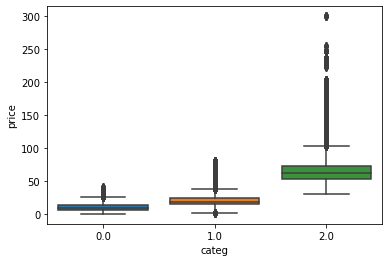

In [195]:
sns.boxplot(x="categ", y="price", data= Categorie_P)


# Courbe de lorenz

In [196]:
Lapage.head()

,id_prod,date_l,session_id,client_id,price,categ,sex,Age,year,month,Age_Range
0,0_1518,2022-05-20,s_211425,c_103,4.18,0.0,f,37,2022,5,35 to 44
1,0_1518,2021-07-20,s_64849,c_103,4.18,0.0,f,37,2021,7,35 to 44
2,0_1518,2022-08-20,s_255965,c_103,4.18,0.0,f,37,2022,8,35 to 44
3,0_1418,2022-06-18,s_225411,c_103,8.57,0.0,f,37,2022,6,35 to 44
4,0_1418,2021-08-18,s_77214,c_103,8.57,0.0,f,37,2021,8,35 to 44


In [197]:
CA_Client = Lapage.copy()
CA_Client.rename(columns={'price': 'C_A'}, inplace =True)
CA_Client.drop(columns=["session_id", "categ", "id_prod", "date_l", "year", "sex", "Age", "month"], inplace=True)
CA_Client.groupby(by ="client_id").mean().reset_index()


,client_id,C_A
0,c_1,14.312308
1,c_10,23.337931
2,c_100,31.856250
3,c_1000,18.095120
4,c_1001,17.773137
...,...,...
8595,c_995,13.529286
8596,c_996,17.111368
8597,c_997,25.254407
8598,c_998,52.450566


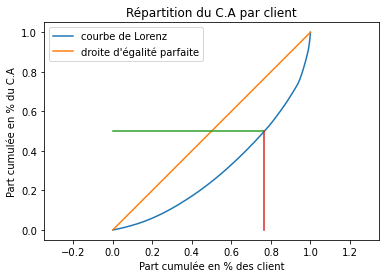

In [198]:
repart_ca_clients = CA_Client[CA_Client['C_A'] > 0] 
dep = repart_ca_clients["C_A"].values 
n = len(dep) 

lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) 
medial = lorenz[(lorenz < 0.5)].size / lorenz.size

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) 
plt.plot(xaxis,lorenz,drawstyle='steps-post', label = "courbe de Lorenz")
plt.plot(xaxis,xaxis, label = "droite d'égalité parfaite")
plt.plot([0,medial],[0.5,0.5])
plt.plot([medial,medial],[0,0.5])
plt.xlabel("Part cumulée en % des client")
plt.ylabel('Part cumulée en % du C.A')
plt.title("Répartition du C.A par client")
plt.legend()
plt.show()


# Calcul indice de Gini

In [199]:
AUC = (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S 
print('Indice de Gini:',gini.round(2))

Indice de Gini: 0.4
